In [223]:
import urllib.request
import re
import pandas as pd
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
repo_count = 236 #number of repos

In [194]:
total_page = 236//30 + 1 if 4%5 > 0 else 0
data = []
for i in range(1, total_page+1):
    tmp = urllib.request.urlopen(f'https://github.com/orgs/neurodata/repositories?page={i}')
    data.append(tmp.read().decode('utf-8'))
    print(tmp.url)

https://github.com/orgs/neurodata/repositories?page=1
https://github.com/orgs/neurodata/repositories?page=2
https://github.com/orgs/neurodata/repositories?page=3
https://github.com/orgs/neurodata/repositories?page=4
https://github.com/orgs/neurodata/repositories?page=5
https://github.com/orgs/neurodata/repositories?page=6
https://github.com/orgs/neurodata/repositories?page=7
https://github.com/orgs/neurodata/repositories?page=8


In [195]:
data[0][:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-1G4rYJktwRTQKn7fVfJUxH8RRZFUJlGo77xMZfBfIhZPx4BHVrzPE1VgnafttXI8G3y/PywH3uXyhNkSLp3+oA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-d46e2b60992dc114d02a7edf55f254c4.css" /><link crossorigin="anonymous" media="all" integrity="sha512-hI5b2oqTE9njfjYrfuzXqA4bSGSNrE5OMc9IiFhZy+RDGg9Qn4Si1A97o0MlinlwFt3xAifvoLX0s7jH

In [263]:
dat = []
rl = 500 #read length

for d in data:
    exist = True

    while exist:
        exist = re.search('/neurodata/.*/issues', d)

        if not exist:
            break

        idx = re.search('href="/neurodata/.*/issues', d).span()
        key = d[idx[0]:idx[1]]
        tmp = d[idx[0]:idx[0]+rl]
        # print(tmp)
        tmp_loc = tmp.find('\n</a>\n')
        dat.append((re.split('/', key)[2], (int(tmp[tmp_loc-3:tmp_loc]))))
        d = d[idx[0]+rl:]

In [264]:
len(dat), dat[:30]

(236,
 [('hyppo', 32),
  ('SDTF', 8),
  ('neurodata.io', 3),
  ('graph-stats-book', 17),
  ('SPORF', 90),
  ('kdg', 8),
  ('ProgLearn', 43),
  ('ood-workshop', 0),
  ('brainlit', 72),
  ('bilateral-connectome', 8),
  ('m2g', 28),
  ('nd_ed', 2),
  ('double_descent', 0),
  ('scikit-learn', 5),
  ('graphbook-code', 2),
  ('talks', 1),
  ('MCC', 3),
  ('hierarchical', 0),
  ('maggot_models', 33),
  ('latex-template', 0),
  ('df-dn-paper', 12),
  ('goat', 0),
  ('scipy', 0),
  ('combining-representations', 0),
  ('task-similarity', 2),
  ('notebooks', 1),
  ('CloudReg', 1),
  ('improving-latent-distribution-test', 0),
  ('maggot_connectome', 11),
  ('grow-ext-bibtex-print', 0)])

In [266]:
df = pd.DataFrame(data=dat, columns=['Repository', 'Issues'])
df.head(20)

,Repository,Issues
0,hyppo,32
1,SDTF,8
2,neurodata.io,3
3,graph-stats-book,17
4,SPORF,90
5,kdg,8
6,ProgLearn,43
7,ood-workshop,0
8,brainlit,72
9,bilateral-connectome,8


In [267]:
sorted_df = df.sort_values(by='Issues', ascending=False)
sorted_df.head(20)

,Repository,Issues
163,ndstore,99
4,SPORF,90
8,brainlit,72
6,ProgLearn,43
150,ndwebsite,39
140,ndviz,36
18,maggot_models,33
0,hyppo,32
10,m2g,28
67,mgcpy-old,27


Text(0, 0.5, 'Issues')

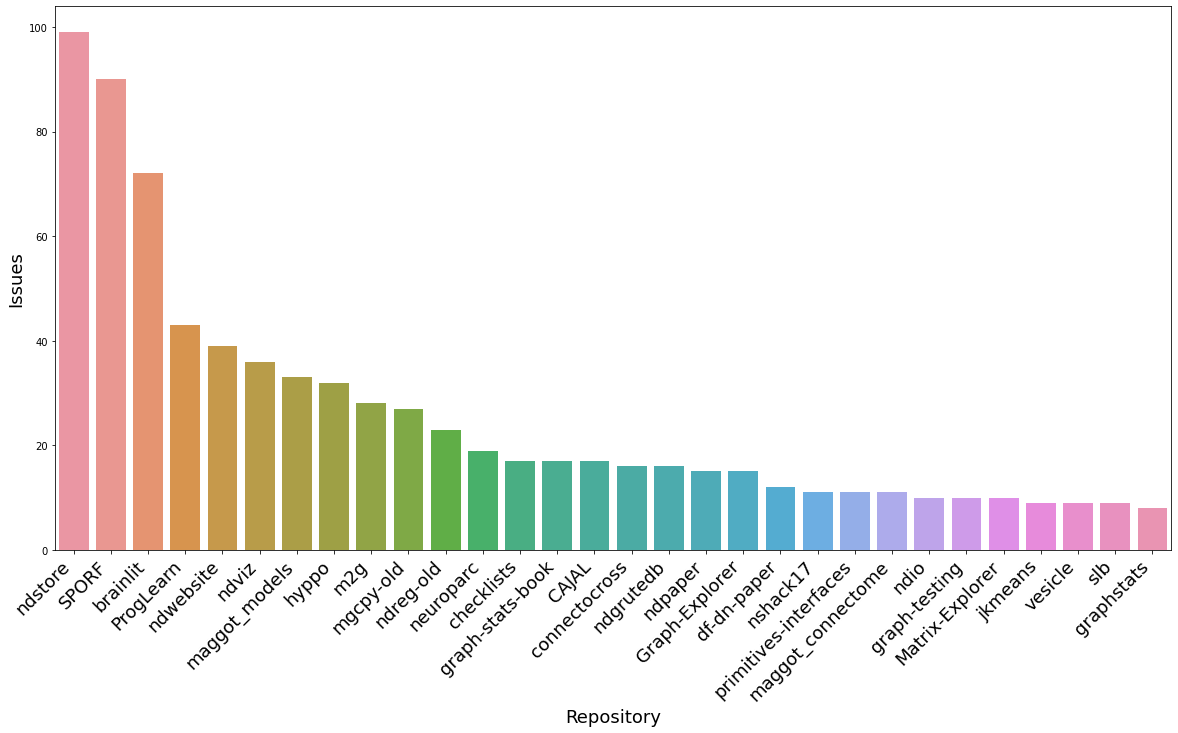

In [273]:
xlabel = 'Repository'
ylabel = 'Issues'

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(data=sorted_df.head(30), x=xlabel, y=ylabel, ax=ax)
ax.set_xticklabels(labels=sorted_df['Repository'][:30], rotation=45, ha='right', fontsize=18);
ax.set_xlabel(xlabel=xlabel, fontsize=18)
ax.set_ylabel(ylabel=ylabel, fontsize=18)